#### You are given height_weight.csv file which contains heights and weights of 1000 people. Dataset: https://www.kaggle.com/mustafaali96/weight-height

You need to do this:

1. Load this csv in pandas dataframe and first plot histograms for height and weight parameters
2. Using IQR detect weight outliers and print them
3. Using IQR, detect height outliers and print them

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
df = pd.read_csv('weight-height.csv')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


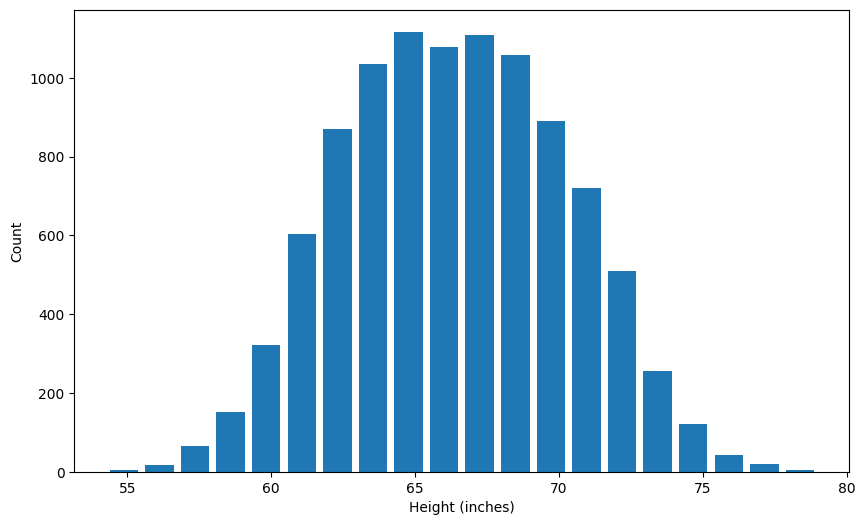

In [88]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)
plt.hist(df.Height, bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

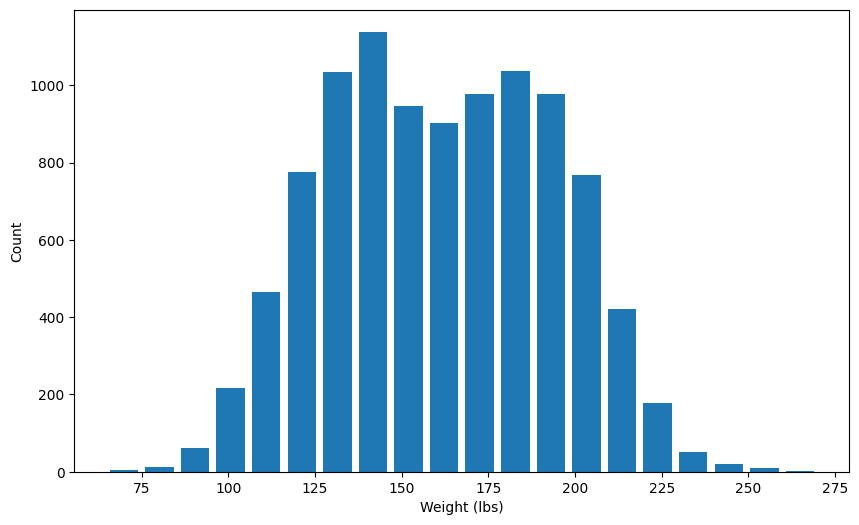

In [89]:
plt.rcParams['figure.figsize'] = (10,6)
plt.hist(df.Weight, bins=20, rwidth=0.8)
plt.xlabel('Weight (lbs)')
plt.ylabel('Count')
plt.show()

# For Height

In [90]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

## Detect outliers using IQR

In [91]:
Q1 = df.Height.quantile(0.25)
Q3 = df.Height.quantile(0.75)
Q1, Q3

(63.505620481218955, 69.1742617268347)

In [92]:
IQR = Q3 - Q1
IQR

5.668641245615746

In [93]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
lower_limit, upper_limit

(55.00265861279534, 77.67722359525831)

### outliers

In [94]:
df[(df.Height < lower_limit) | (df.Height > upper_limit)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


In [95]:
df[(df.Height < lower_limit) | (df.Height > upper_limit)].shape

(8, 3)

## Remove outliers

In [96]:
df_h = df[(df.Height > lower_limit) & (df.Height < upper_limit)]
df_h

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [97]:
df.shape[0] - df_h.shape[0]

8

# For Weight

In [98]:
df_h.Weight.describe()

count    9992.000000
mean      161.422760
std        32.019872
min        68.982530
25%       135.821269
50%       161.197662
75%       187.124646
max       255.863326
Name: Weight, dtype: float64

## Detect outliers using IQR

In [99]:
Q1 = df_h.Weight.quantile(0.25)
Q3 = df_h.Weight.quantile(0.75)
Q1, Q3

(135.82126866320925, 187.1246464833845)

In [100]:
IQR = Q3 - Q1
IQR

51.30337782017526

In [101]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
lower_limit, upper_limit

(58.86620193294637, 264.0797132136474)

### outliers

In [102]:
df_h[(df_h.Weight < lower_limit) | (df_h.Weight > upper_limit)]

,Gender,Height,Weight


## Remove outliers

In [103]:
df_wh = df_h[(df_h.Weight > lower_limit) & (df_h.Weight < upper_limit)]
df_wh

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [104]:
df_h.shape[0] - df_wh.shape[0]

0

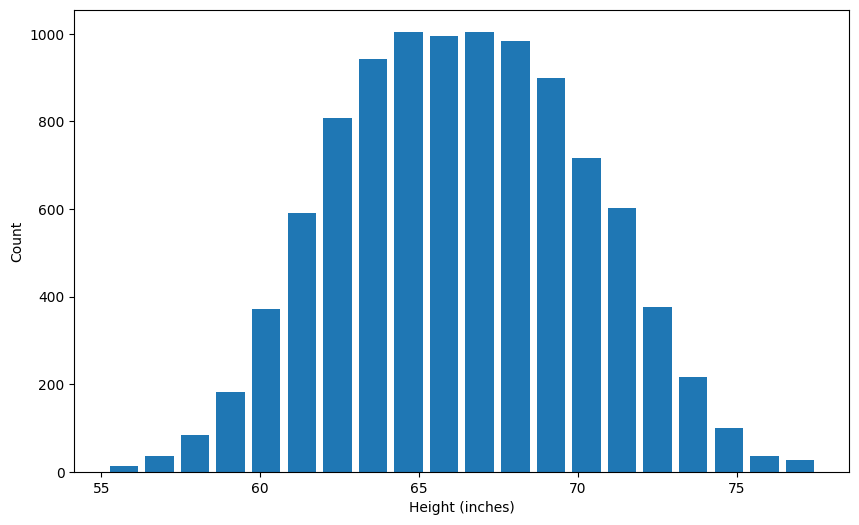

In [105]:
plt.rcParams['figure.figsize'] = (10,6)
plt.hist(df_wh.Height, bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

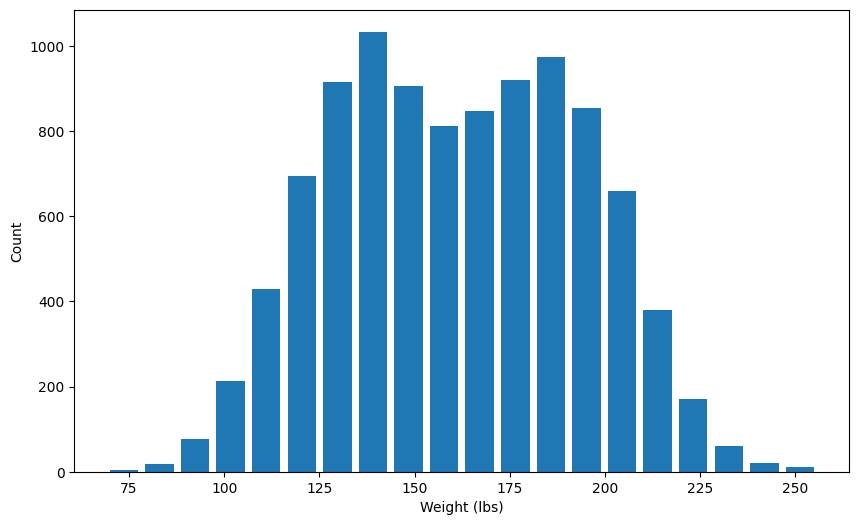

In [106]:
plt.rcParams['figure.figsize'] = (10,6)
plt.hist(df_wh.Weight, bins=20, rwidth=0.8)
plt.xlabel('Weight (lbs)')
plt.ylabel('Count')
plt.show()